In [1]:
import sys
import json
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [4]:
crimes = pd.read_csv('../data/cleaned/crime-processed.csv')

crimes.head()

,DR_NO,Date Rptd,Year,AREA NAME,Rpt Dist No,Crime Type,Crm Cd Desc,Arrested,LAT,LON
0,1307355,2010-02-20,2010,Newton,1385,Infraction,VIOLATION OF COURT ORDER,1,33.9825,-118.2695
1,11401303,2010-09-13,2010,Pacific,1485,Felony,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,33.9599,-118.3962
2,70309629,2010-08-09,2010,Newton,1324,Others,OTHER MISCELLANEOUS CRIME,0,34.0224,-118.2524
3,90631215,2010-01-05,2010,Hollywood,646,Infraction,VIOLATION OF COURT ORDER,0,34.1016,-118.3295
4,100100501,2010-01-03,2010,Central,176,Felony,"RAPE, ATTEMPTED",0,34.0387,-118.2488


In [5]:
crimes.isnull().mean()

DR_NO          0.0
Date Rptd      0.0
Year           0.0
AREA NAME      0.0
Rpt Dist No    0.0
Crime Type     0.0
Crm Cd Desc    0.0
Arrested       0.0
LAT            0.0
LON            0.0
dtype: float64

In [6]:
crimes.dtypes

DR_NO            int64
Date Rptd       object
Year             int64
AREA NAME       object
Rpt Dist No      int64
Crime Type      object
Crm Cd Desc     object
Arrested         int64
LAT            float64
LON            float64
dtype: object

In [7]:
# AREA NAME
print('Number of unique divisions: {}'.format(crimes['AREA NAME'].nunique()))
crimes['AREA NAME'].unique()

Number of unique divisions: 21


array(['Newton', 'Pacific', 'Hollywood', 'Central', 'Northeast',
       'Hollenbeck', 'Southwest', 'Southeast', 'Rampart', 'Olympic',
       'Wilshire', '77th Street', 'Harbor', 'West LA', 'Van Nuys',
       'West Valley', 'Topanga', 'N Hollywood', 'Mission', 'Foothill',
       'Devonshire'], dtype=object)

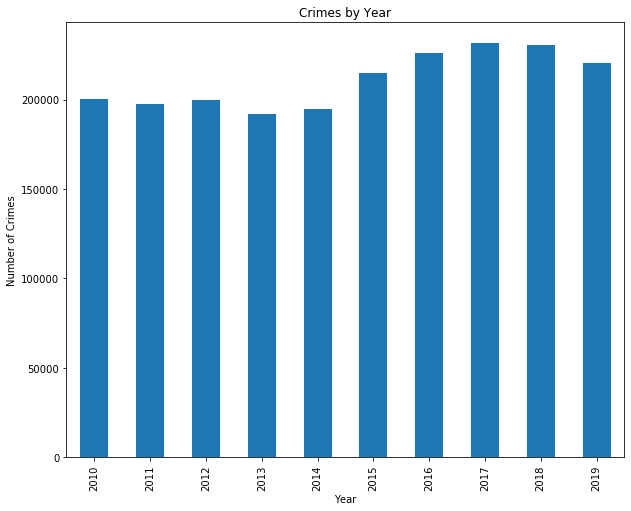

In [37]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)
crimes.loc[crimes.Year != 2020].groupby('Year').size().plot(kind='bar', ax=ax)
plt.title('Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

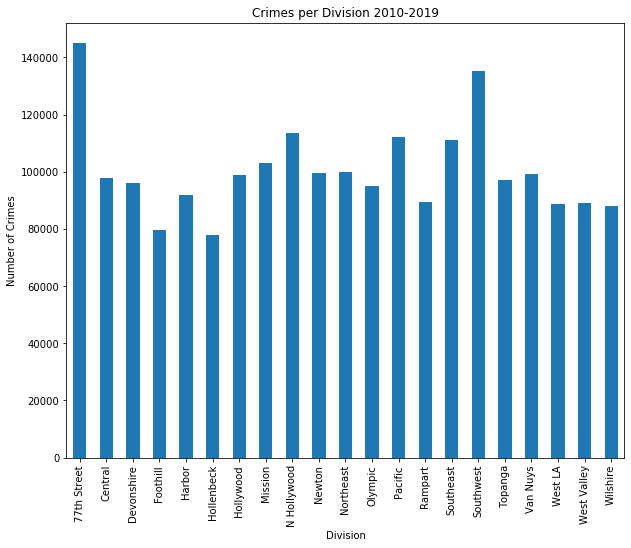

In [38]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)
crimes.loc[crimes.Year != 2020].groupby('AREA NAME').size().plot(kind='bar', ax=ax)
plt.title('Crimes per Division 2010-2019')
plt.xlabel('Division')
plt.ylabel('Number of Crimes')
plt.show()

In [16]:
crimes_by_area_year = crimes.loc[crimes.Year != 2020].groupby(['Year', 'AREA NAME']).size().unstack().T

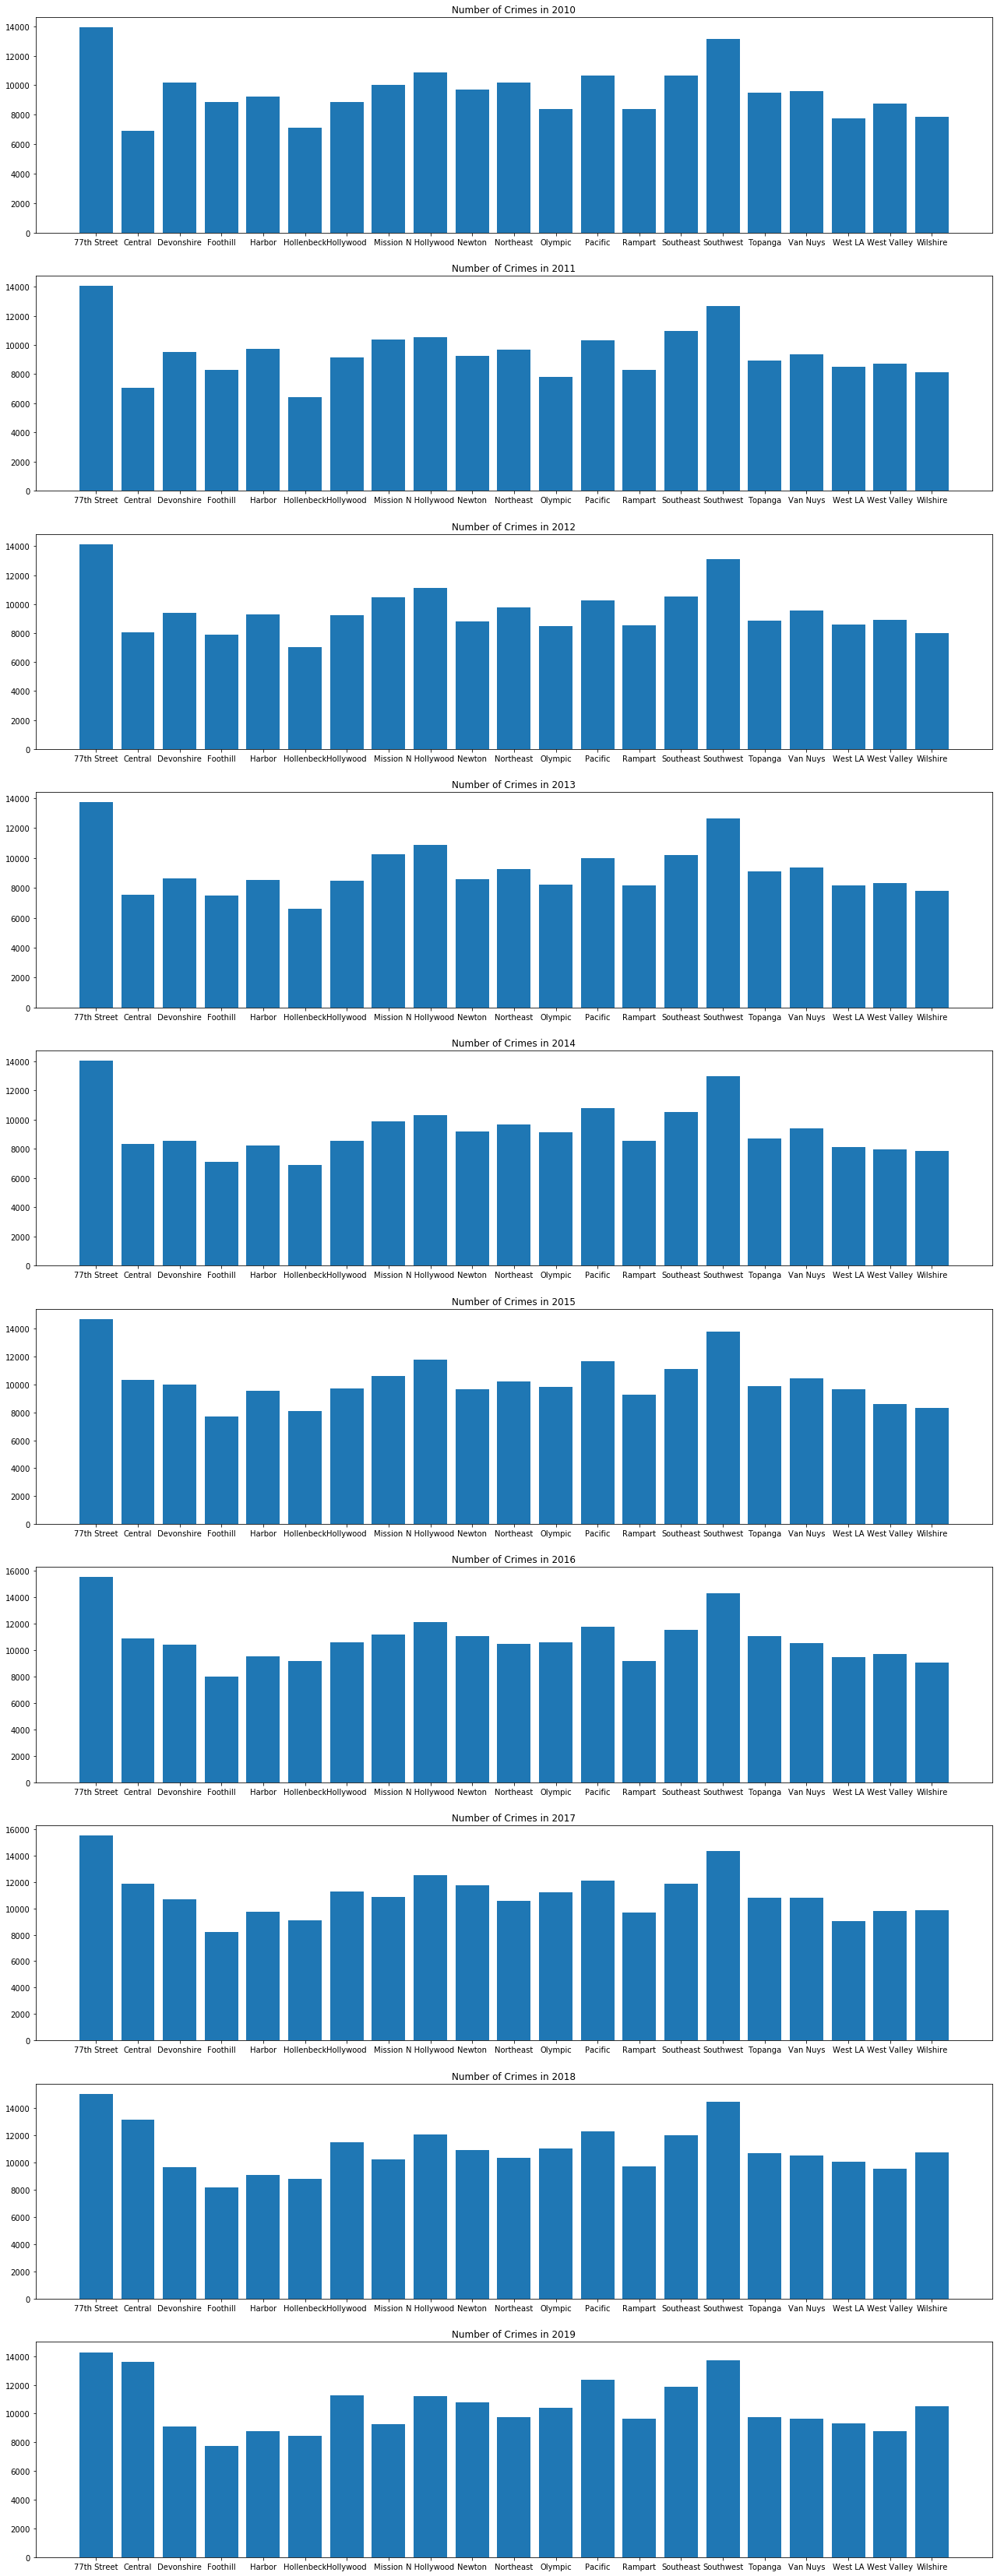

In [29]:
fig=plt.figure(figsize=(22,60))
fig.tight_layout()
columns = 1
rows = 10
for idx, col in enumerate(crimes_by_area_year.columns):
    fig.add_subplot(rows, columns, idx+1)
    plt.bar(crimes_by_area_year.index, crimes_by_area_year[col])
    plt.title('Number of Crimes in {}'.format(col))
plt.show()

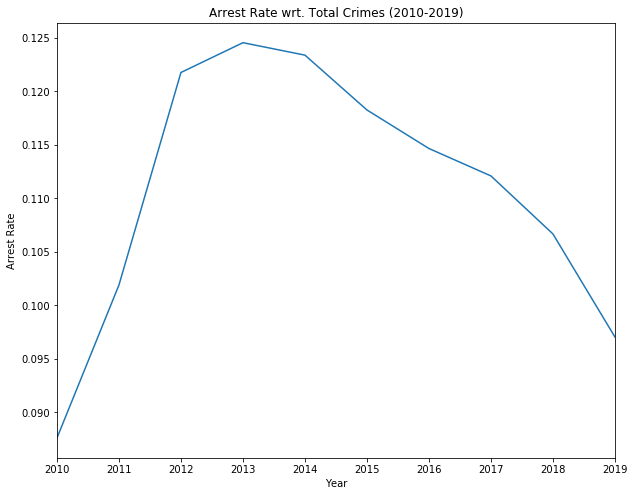

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)
crimes.loc[crimes.Year != 2020].groupby('Year')['Arrested'].mean().plot()
plt.title('Arrest Rate wrt. Total Crimes (2010-2019)')
plt.ylabel('Arrest Rate')
plt.show()

In [11]:
arrest_by_area_year = crimes.loc[crimes.Year != 2020].groupby(['Year', 'AREA NAME'])['Arrested'].mean().unstack()
arrest_by_area_year

AREA NAME,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.007401,0.086222,0.006682,0.037187,0.187554,0.127400,0.098453,0.045014,0.100836,0.122523,...,0.148099,0.052019,0.171541,0.151117,0.091918,0.052509,0.093760,0.019742,0.097645,0.084599
2011,0.047168,0.086846,0.083061,0.126085,0.168894,0.149611,0.108584,0.047132,0.099229,0.150119,...,0.181133,0.064110,0.173130,0.135961,0.112249,0.047837,0.083894,0.031939,0.097140,0.095150
2012,0.117564,0.098609,0.079655,0.114507,0.164338,0.133485,0.131929,0.075849,0.106973,0.156059,...,0.167414,0.089759,0.176222,0.138596,0.128832,0.118809,0.137378,0.094749,0.129209,0.109114
2013,0.117428,0.103982,0.102253,0.130360,0.168210,0.133394,0.129249,0.158582,0.108257,0.115295,...,0.167275,0.088831,0.163193,0.126398,0.118970,0.127024,0.135903,0.087170,0.127965,0.111439
2014,0.114180,0.096504,0.086169,0.151549,0.166646,0.121274,0.120005,0.173028,0.141559,0.098967,...,0.137345,0.087509,0.139728,0.120194,0.112131,0.146674,0.144539,0.086380,0.138707,0.111111
2015,0.113940,0.094457,0.096455,0.152729,0.146802,0.118541,0.114847,0.148232,0.149258,0.095332,...,0.122443,0.086770,0.126535,0.128205,0.099544,0.131590,0.150062,0.090202,0.137983,0.089892
2016,0.100471,0.090089,0.103621,0.159616,0.129009,0.108037,0.095431,0.140222,0.146603,0.088544,...,0.115156,0.087427,0.128040,0.119643,0.099748,0.125102,0.162658,0.083923,0.154331,0.094285
2017,0.094734,0.084556,0.101402,0.151951,0.129029,0.113801,0.097652,0.148237,0.135308,0.080177,...,0.125579,0.084297,0.119257,0.104630,0.101492,0.129101,0.168147,0.089704,0.143339,0.084307
2018,0.097729,0.078120,0.105361,0.140809,0.152866,0.096358,0.088752,0.141063,0.133719,0.089828,...,0.103832,0.097016,0.106302,0.089112,0.094991,0.118655,0.147109,0.093735,0.123250,0.084816


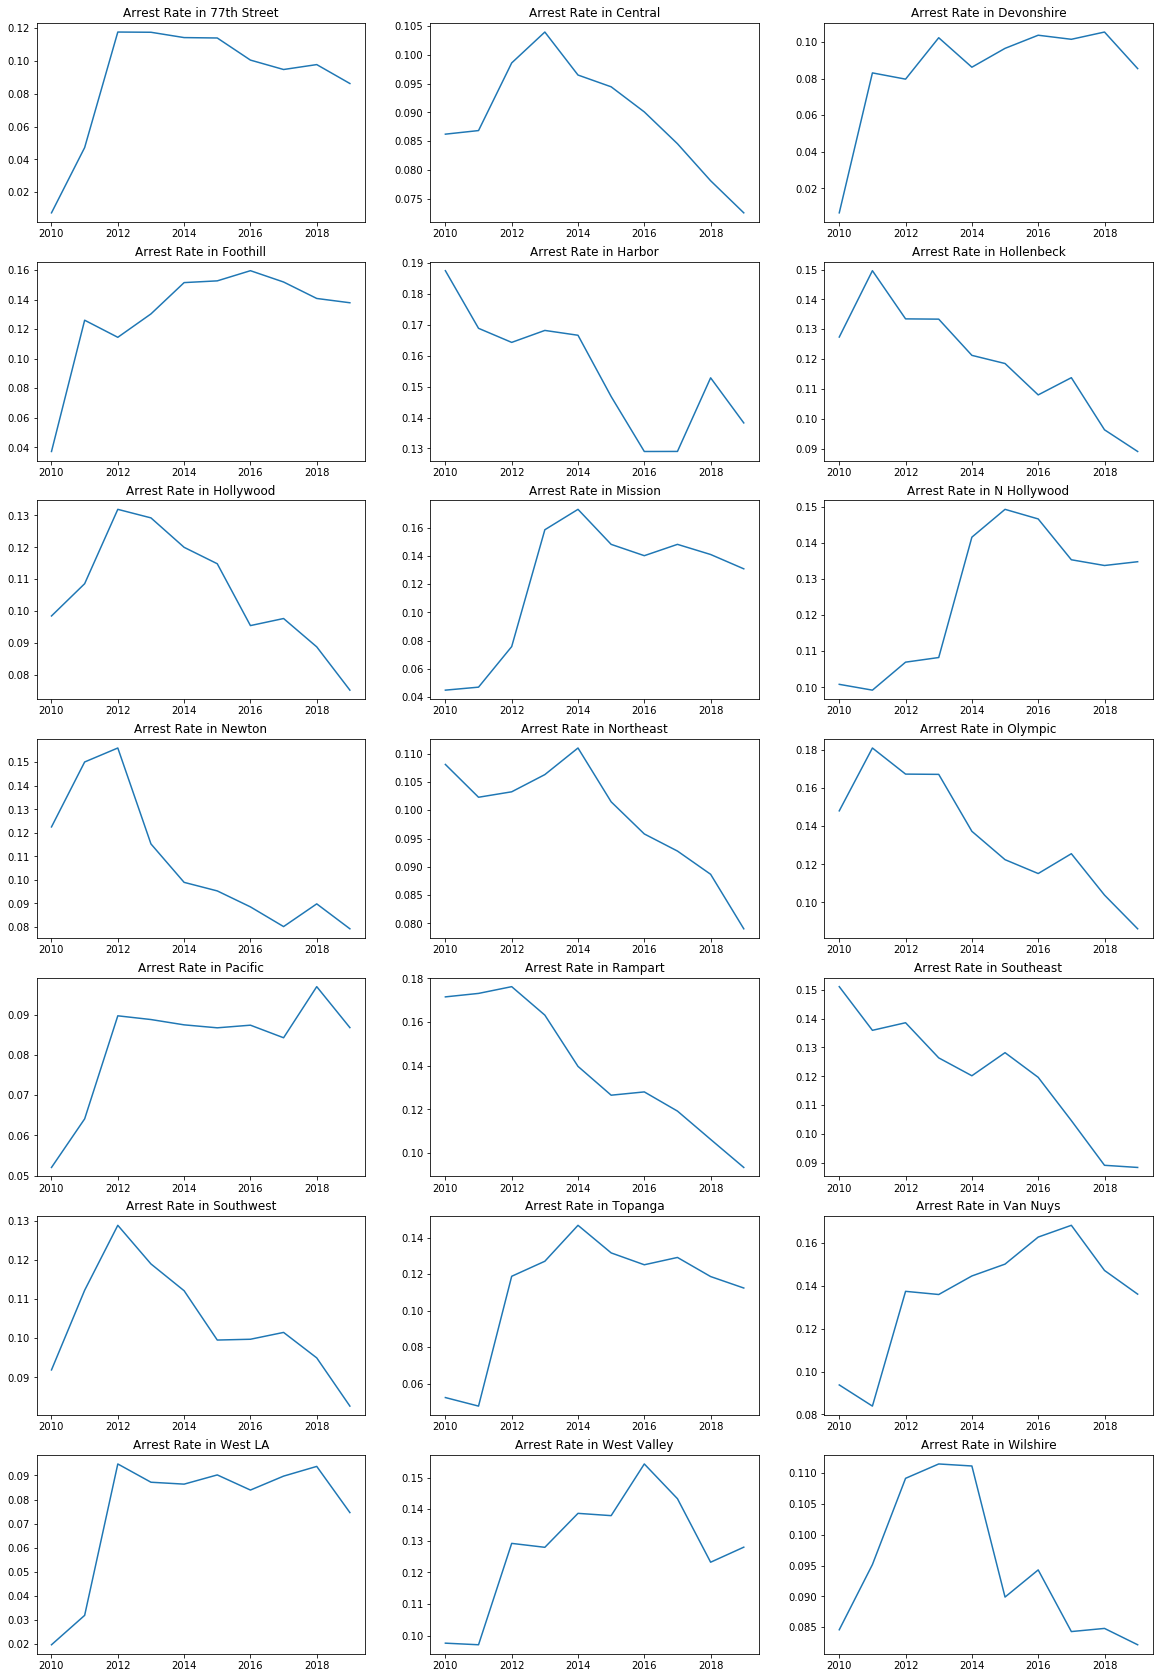

In [31]:
fig=plt.figure(figsize=(20,30))
fig.tight_layout()
columns = 3
rows = 7
for idx, col in enumerate(arrest_by_area_year.columns):
    fig.add_subplot(rows, columns, idx+1)
    plt.plot(arrest_by_area_year[col])
    plt.title('Arrest Rate in {}'.format(col))
plt.show()

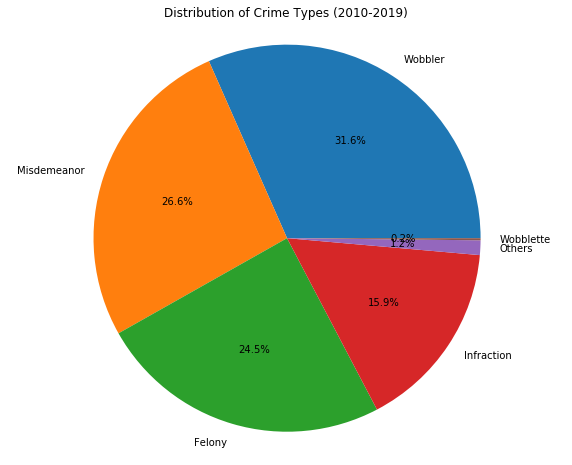

In [57]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)
a = crimes.loc[crimes.Year != 2020]['Crime Type'].value_counts(normalize=True)
plt.pie(a, labels=a.index, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Distribution of Crime Types (2010-2019)')
plt.show()

In [46]:
foo = crimes.loc[crimes.Year != 2020].groupby('AREA NAME')['Crime Type'].value_counts(normalize=True).unstack()

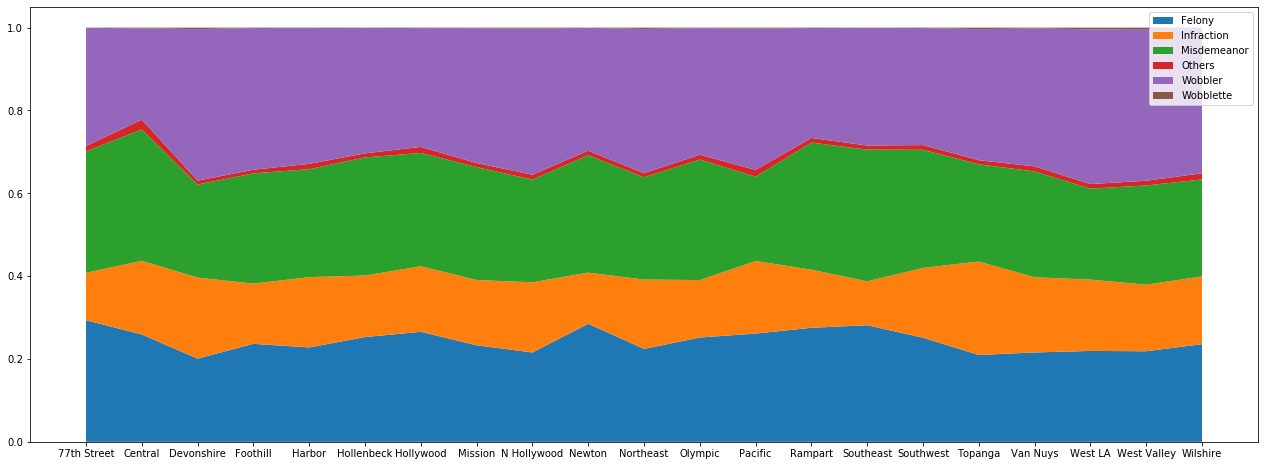

In [59]:
fig = plt.figure(figsize=(22, 8))
ax = fig.add_subplot(1,1,1)
stacked = plt.stackplot(foo.index, foo.T)
legendProxies = []
for stack in stacked:
    legendProxies.append(plt.Rectangle((0, 0), 1, 1, fc=stack.get_facecolor()[0]))
plt.legend(legendProxies, foo.columns)

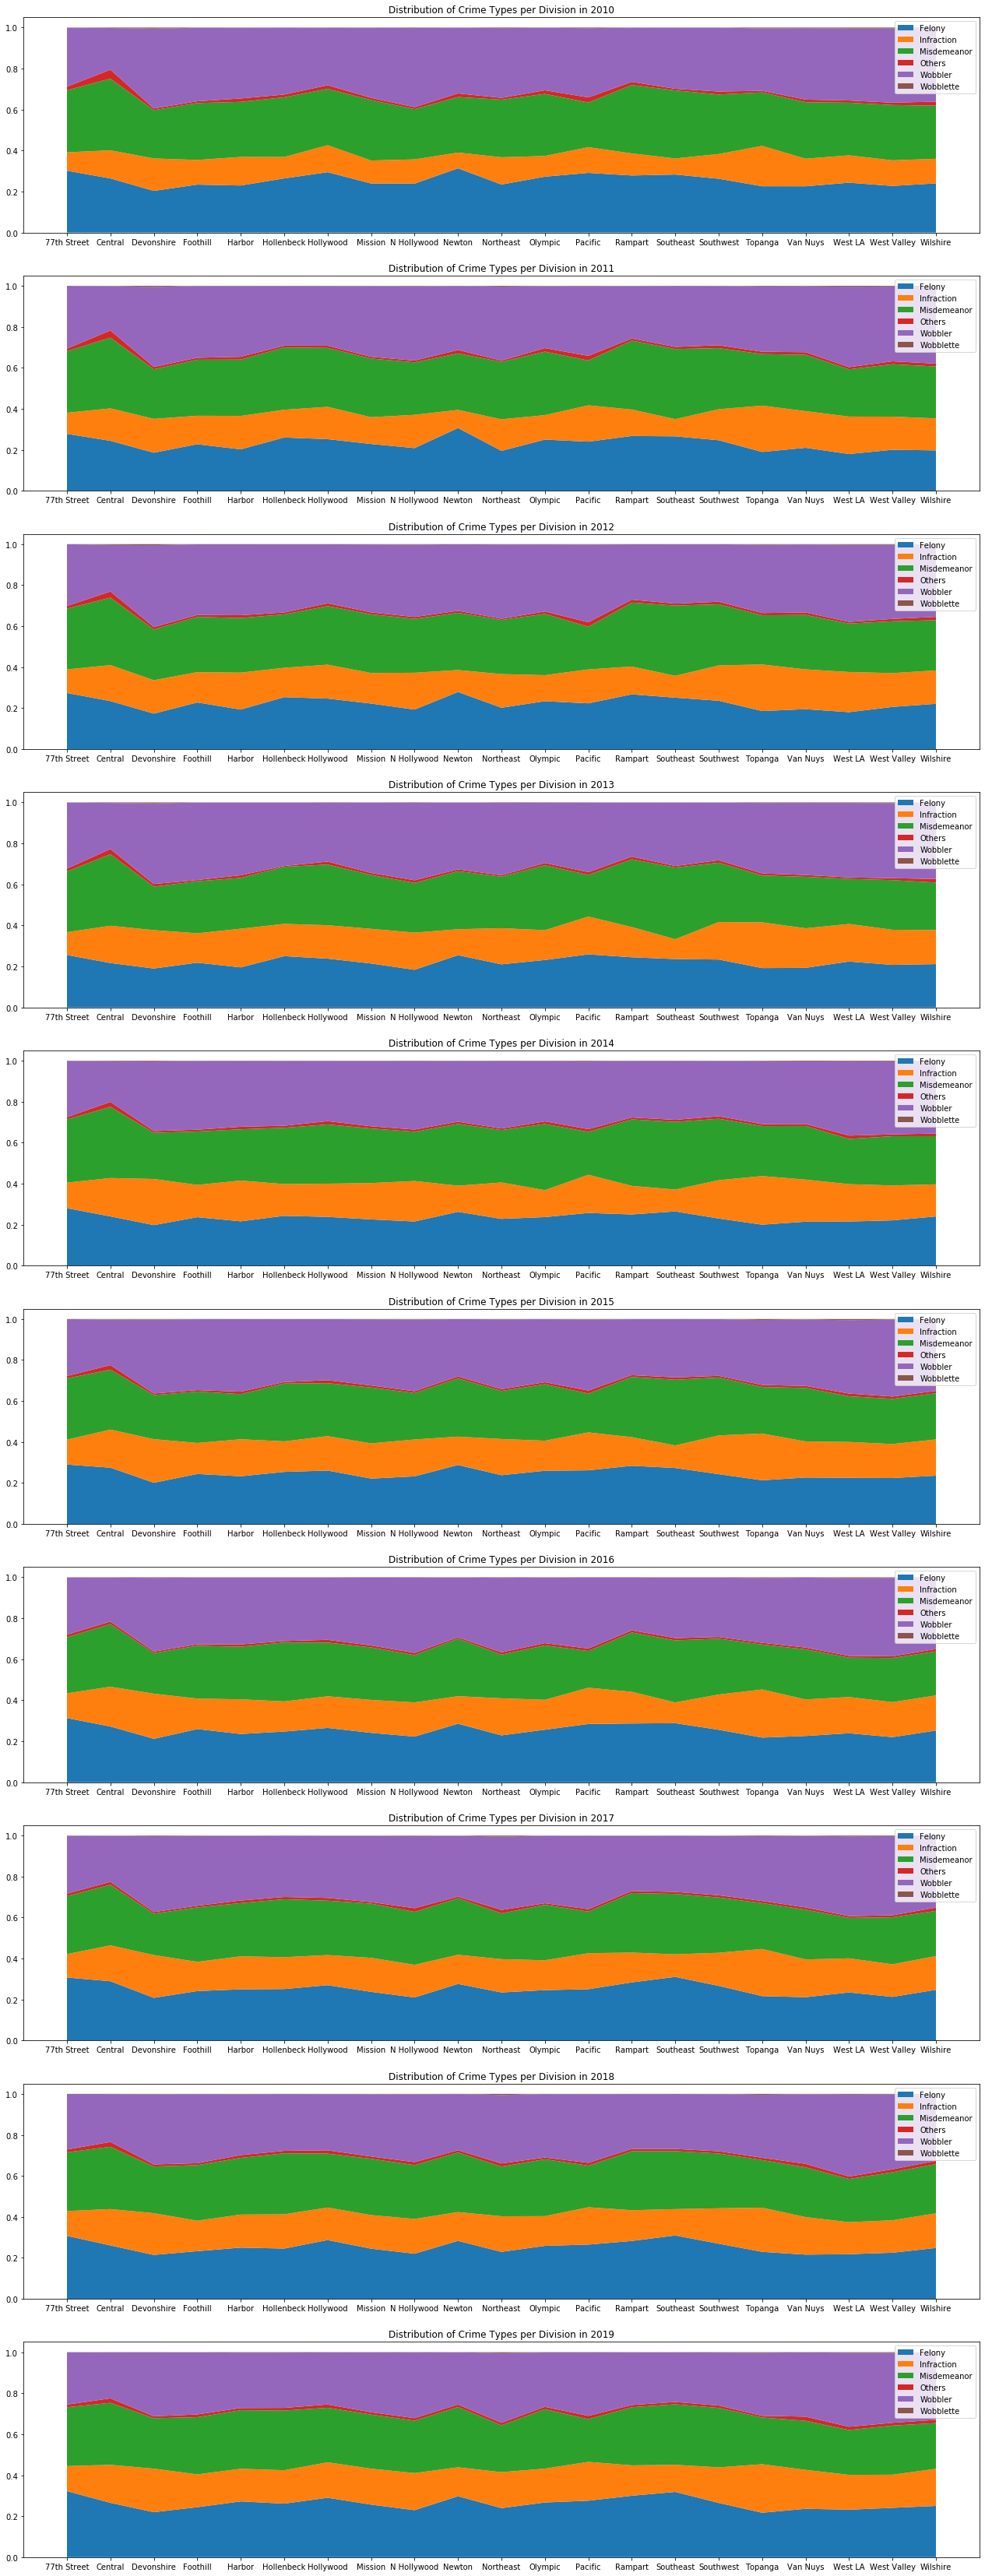

In [73]:
foo = crimes.loc[crimes.Year != 2020].groupby(['Year', 'AREA NAME'])['Crime Type'].value_counts(normalize=True).unstack()
fig=plt.figure(figsize=(22,60))
fig.tight_layout()
columns = 1
rows = 10
for idx, year in enumerate(range(2010,2020)):
    fig.add_subplot(rows, columns, idx+1)
    stacked = plt.stackplot(foo.loc[year].index, foo.loc[year].T)
    legendProxies = []
    for stack in stacked:
        legendProxies.append(plt.Rectangle((0, 0), 1, 1, fc=stack.get_facecolor()[0]))
    plt.legend(legendProxies, foo.loc[year].columns)
    plt.title('Distribution of Crime Types per Division in {}'.format(year))
plt.show()